<a href="https://colab.research.google.com/github/Elavat9000/practica-de-machine-learning./blob/main/practica_de_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-es-cursos/2160-aprendiendo-a-clasificar-datos-con-ml/refs/heads/desafio/churn.csv'

In [ ]:
datos = pd.read_csv(url)

In [ ]:
datos.head()

,id_cliente,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,15634602,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
datos = datos.drop('id_cliente', axis=1)
datos.head()

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
import plotly.express as px

In [ ]:
datos.columns

Index(['score_credito', 'pais', 'sexo_biologico', 'edad', 'años_de_cliente',
       'saldo', 'servicios_adquiridos', 'tiene_tarjeta_credito',
       'miembro_activo', 'salario_estimado', 'churn'],
      dtype='object')

#VARIABLES CATEGORICAS



*   pais   
*   sexo_biologico
*   servicios_adquiridos
*   tiene_tarjeta_credito
*   miembro_activo





In [ ]:
px.histogram(datos,'pais',color='churn',barmode='group',text_auto=True)

In [ ]:
px.histogram(datos,'sexo_biologico',color='churn',barmode='group',text_auto=True)

In [ ]:
px.histogram(datos, x = 'tiene_tarjeta_credito', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(datos, x = 'miembro_activo', text_auto = True, color = 'churn', barmode = 'group')

#Variables numericas

*   score_credito
*   edad
*   saldo
*   salario_estimado
*   churn
*   años_cliente
*   servicios_adquiridos

In [ ]:
px.box(datos, x = 'score_credito', color = 'churn')

In [ ]:
px.box(datos, x = 'edad', color = 'churn')

In [ ]:
px.box(datos, x = 'años_de_cliente', color = 'churn')

In [ ]:
px.box(datos, x = 'saldo', color = 'churn')

In [ ]:
px.box(datos, x = 'servicios_adquiridos', color = 'churn')

In [ ]:
px.box(datos, x = 'salario_estimado', color = 'churn')

#Variables explicativas y variable de respuesta

en este primer caso se Quita el churn para la variable objetivo, ademas de que se cra otro df para las variables explicativas

In [ ]:
X = datos.drop('churn', axis=1)
y = datos['churn']

Transformando las variables explicativas

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columnas = X.columns
columnas

Index(['score_credito', 'pais', 'sexo_biologico', 'edad', 'años_de_cliente',
       'saldo', 'servicios_adquiridos', 'tiene_tarjeta_credito',
       'miembro_activo', 'salario_estimado'],
      dtype='object')

In [ ]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['pais', 'sexo_biologico','tiene_tarjeta_credito', 'miembro_activo']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False
                                  )

In [ ]:
X = one_hot.fit_transform(X)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [ ]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 8.3807860e+04,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.5966080e+05,
        3.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.5075310e+04,
        2.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.3014279e+05,
        1.0000000e+00, 3.8190780e+04]])

In [ ]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__sexo_biologico_Mujer,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,0.0,1.0,0.0,1.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,0.0,0.0,1.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,0.0,0.0,1.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,0.0,1.0,0.0,1.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,1.0,0.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,0.0,0.0,1.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,1.0,0.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

#Dividiendo los datos entre entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

#Modelo de referencia - Baseline

In [ ]:
from sklearn.dummy import DummyClassifier


In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7964

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_Arbol = DecisionTreeClassifier( max_depth= 4, random_state=5)
modelo_Arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [ ]:
modelo_Arbol.score(X_test, y_test)

0.8464

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

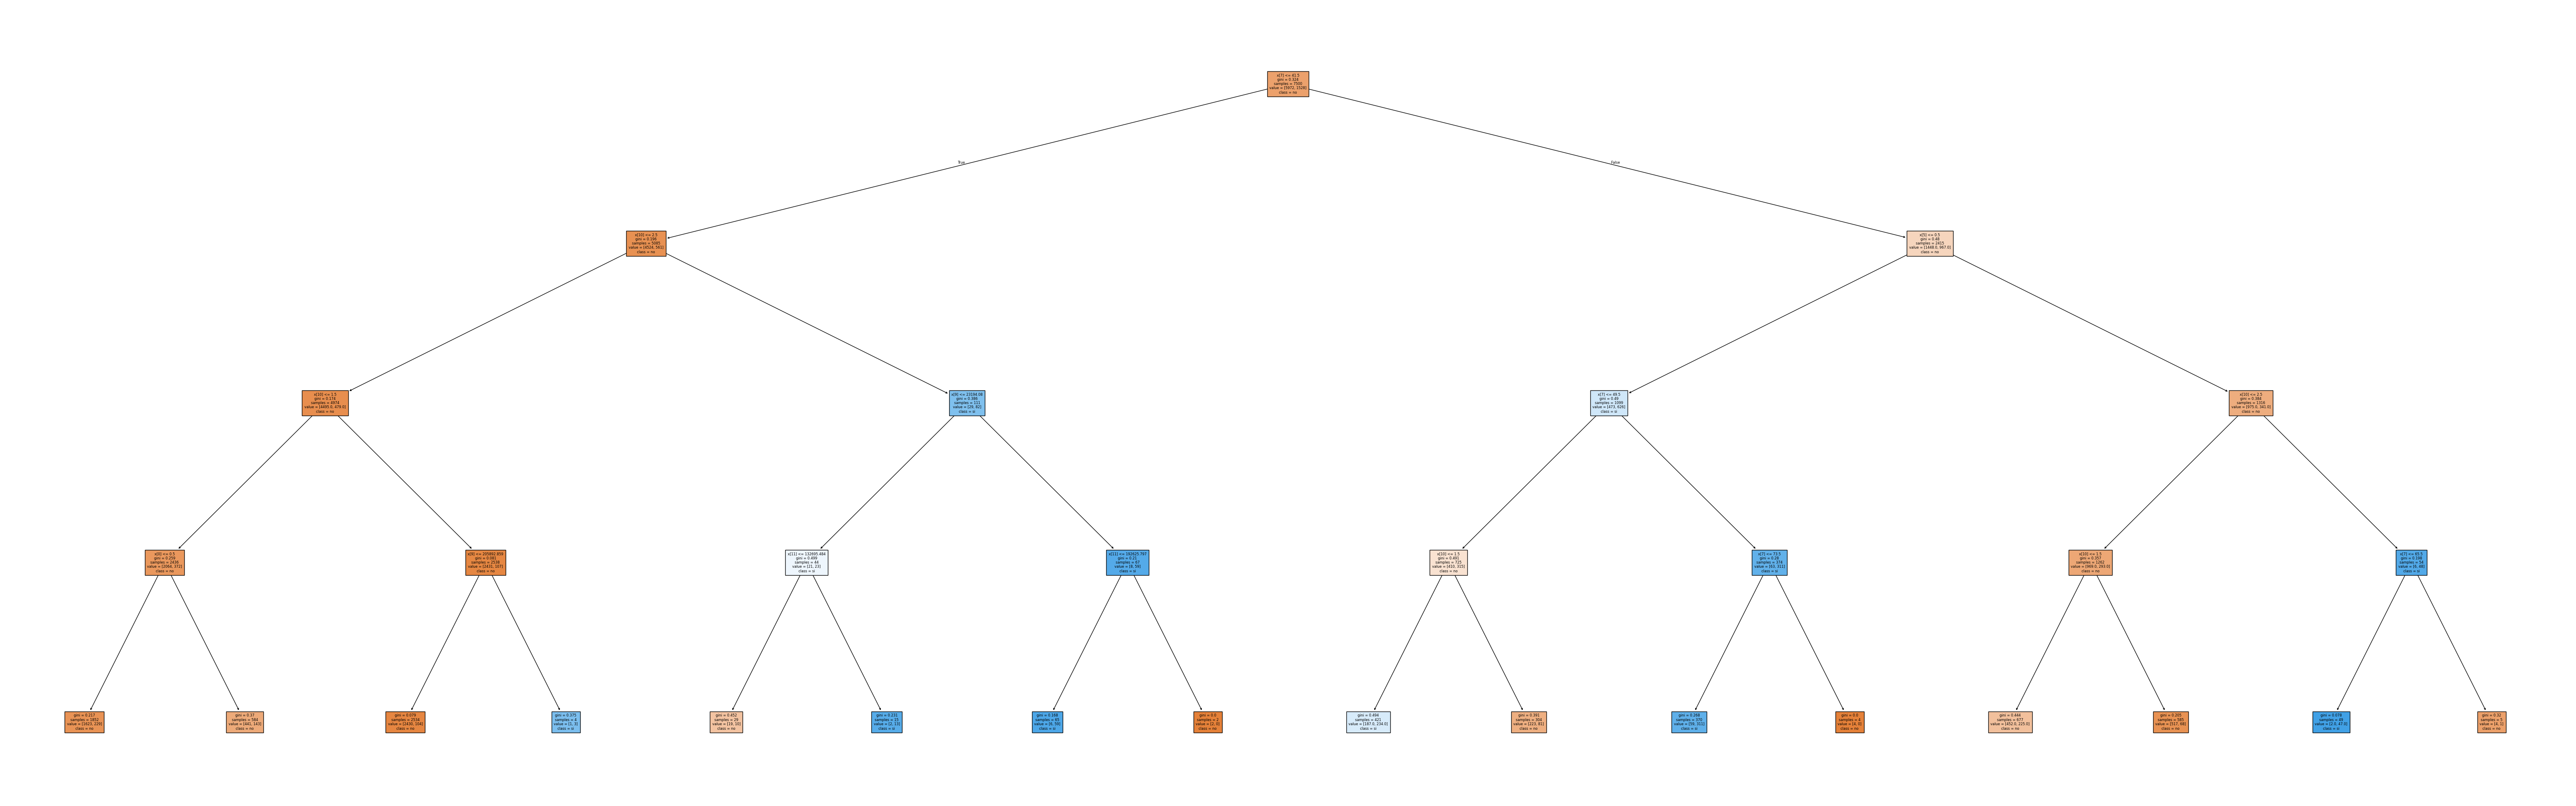

In [ ]:
plt.figure(figsize=(80,25))
plot_tree(modelo_Arbol, filled=True, class_names=['no','si'],fontsize=6,);

#Selección de modelos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,1.0,0.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,0.0,0.0,1.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,0.0,0.0,1.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,0.0,1.0,0.0,1.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,0.0,1.0,0.0,1.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,0.0,1.0,0.0,1.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,0.0,0.0,1.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [ ]:
X_test_normalizado = normalizacion.transform(X_test)

In [ ]:
knn.score(X_test_normalizado, y_test)

0.8172

#Escogiendo y serializando el mejor modelo

In [ ]:
lista = [('dummy',dummy,X_test),('de arbol',modelo_Arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
    print(f'La exactitud del modelo {i[0]} es {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy es 0.7964
La exactitud del modelo de arbol es 0.8464
La exactitud del modelo knn es 0.8172


In [ ]:
import pickle

In [ ]:
with open('modelo_onehotenc.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [ ]:
with open('modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(modelo_Arbol, archivo)

In [ ]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [ ]:
nuevo_dato = pd.DataFrame(nuevo_dato)

In [ ]:
nuevo_dato

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,850,Francia,Hombre,27,3,56000,1,1,1,85270.0


In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_arbol.pkl')

In [ ]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

array([0])